## Import Essetinals

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
### Tensorflow NLP kit
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
##classification metrics
from sklearn.metrics import classification_report

In [4]:
###NLTK tool kit
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
### Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/DataSet/twitter_training.csv.zip') as zip_ref:
  zip_ref.extractall('/content')

In [7]:
train_data = pd.read_csv("/content/twitter_training.csv",names=["Id","BorderLands","Sentiment","tweet"])

In [8]:
train_data.head()

,Id,BorderLands,Sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Cleaning the data/Preprocessing

In [9]:
print(stopwords.words("english"))
EMOTICONS = [":)", ':-)', ': )', ':D', '=)', ':(', ':-(', ': (']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(EMOTICONS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
print(stpwrd)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
import re
def pre_proessingdata(data):
  data = data.drop_duplicates(subset=['tweet'],keep='first')

  ## Remove Emojis from data
  data = data.astype(str).apply(lambda x:x.str.encode('ascii','ignore')).str.decode('ascii')

  # Remove URLS

  def remove_username_link_nums(text):
    text = re.sub("@[^\s]+","",text)
    text = re.sub("http[^\s]","",text)
    text = re.sub(r'\d+','',text)
    return text

  data['tweet'] = data['tweet'].apply(remove_username_link_nums)
  data['tweet'] = data['tweet'].map(lambda x:x.lower())


  lem = WordNetLemmatizer()
  def remove_stopwords(text):
    tokens = []
    for token in text.split():
      if token not in stpwrd:
        tokens.append(lem.lemmatize(token,"v"))
    return " ".join(tokens)

  data["tweet"] = data["tweet"].apply(lambda x:remove_stopwords(x))

  return data






In [12]:
train_data.shape

(74682, 4)

In [13]:
train = train_data[0:65000]

In [14]:
test = train_data[65000:]

In [15]:
###

# Bi directional LSTM

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import re
import string
import random

In [17]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [19]:
nlp =spacy.load("en_core_web_sm")
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("/content/twitter_training.csv")

In [21]:
df.sample(7)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
22899,4324,CS-GO,Neutral,CS : FC GO Wingman Romania - Tech Sunt 2012 no...
4515,1976,CallOfDutyBlackopsColdWar,Positive,Only chose me the best commercial song ever @n...
71830,11104,TomClancysGhostRecon,Negative,be
65165,7961,MaddenNFL,Negative,@EAMaddenNFL fix your servers they’re dog shit
50008,6184,FIFA,Negative,No<unk>......this list is big deal
20947,12786,WorldOfCraft,Positive,WoW Trap. I feel the early days were better in...
55464,2323,CallOfDuty,Negative,@ CallofDuty Remove snipers from Warzone or at...


In [22]:
df.shape

(74681, 4)

In [23]:
print(f'The shape of the dataset is : {df.shape}')

The shape of the dataset is : (74681, 4)


In [24]:
print(f'The columns are :{df.columns}')

The columns are :Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [25]:
print(f'The dtypes of the dataset : \n\n{df.dtypes}')

The dtypes of the dataset : 

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object


In [26]:
df.describe(include="all")

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


# EDA

In [27]:
def show_details(data):
  missed_values = data.isnull().sum()
  missed_val_precentage = missed_values / len(data)
  duplicate_values = data.duplicated().sum()
  duplicated_val_percentage = duplicate_values / len(data)
  info_frame = pd.DataFrame({ 'Missed Values':missed_values,
                             'Missed Values %':missed_val_precentage,
                            'Duplicate Values':duplicate_values,
                             'Duplicated Values %':duplicated_val_percentage })
  return info_frame.T


In [28]:
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed Values,0.000000,0.000000,0.000000,686.000000
Missed Values %,0.000000,0.000000,0.000000,0.009186
Duplicate Values,2700.000000,2700.000000,2700.000000,2700.000000
Duplicated Values %,0.036154,0.036154,0.036154,0.036154


In [29]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed Values,0.0,0.0,0.0,0.0
Missed Values %,0.0,0.0,0.0,0.0
Duplicate Values,0.0,0.0,0.0,0.0
Duplicated Values %,0.0,0.0,0.0,0.0


In [30]:
print(f"After Drop shape {df.shape}")

After Drop shape (71655, 4)


In [31]:
df.rename(columns={'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode'
                   , "im getting on borderlands and i will murder you all ,": 'Text'}, inplace=True)

In [32]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text'], dtype='object')

In [33]:
print(f"Number of Unique Land: {len(df.Land.unique())}")
print("**" * 40)
df.Land.unique()

Number of Unique Land: 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [34]:
lands = df.Land.value_counts()
lands.to_frame()

,count
Land,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


**Description**
* We can see that distribution is quite the same for each area .
* between the range 2150 to 2328 changeably * Now we just show 10 of the hihest ones

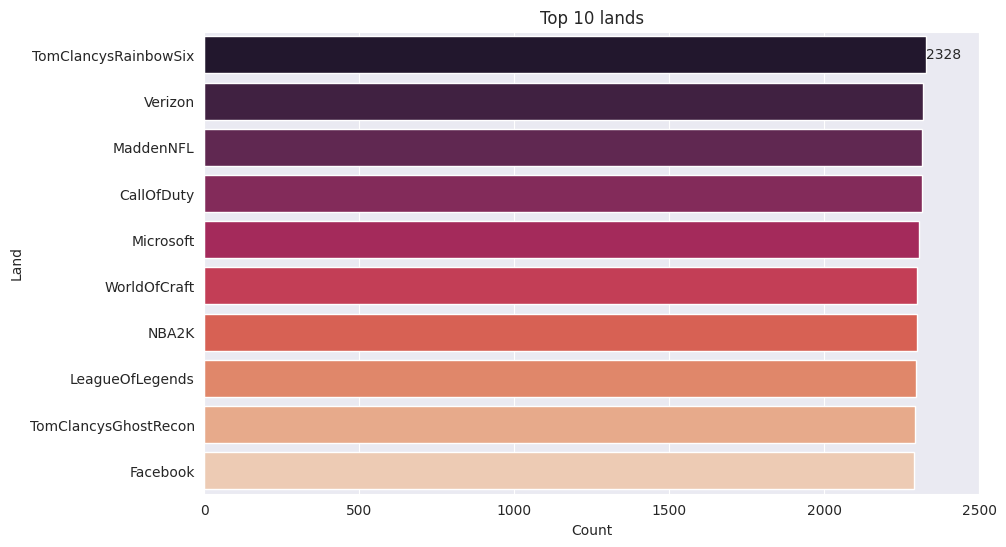

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
bar=sns.barplot(x=lands.values[:10],y=lands.index[:10],palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Top 10 lands')
plt.xlabel('Count')
plt.ylabel('Land')
plt.xlim(0,2500)
plt.show()

In [36]:
##Unique Values
print(f"The unique values of mode {len(df.Mode.unique())}")
print("**" * 20)
print(df.Mode.unique())

The unique values of mode 4
****************************************
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [37]:
mode = df.Mode.value_counts()
mode.to_frame().T

Mode,Negative,Positive,Neutral,Irrelevant
count,21698,19712,17708,12537


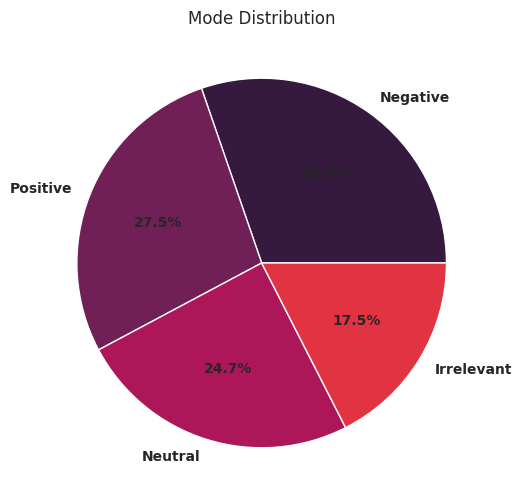

In [38]:
plt.figure(figsize=(6,6))
plt.pie(x=mode.values,labels=mode.keys(),autopct="%1.1f%%",textprops={"fontsize":10,"fontweight":"black"}
        ,colors=sns.color_palette("rocket"))
plt.title("Mode Distribution")
plt.show()

In [39]:
pd.crosstab(df.Mode,df.Land).T.style.background_gradient(subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'],cmap='Greens')\
.background_gradient(subset=['Irrelevant'],cmap='BuGn')

Mode,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


In [40]:
## Clean Emoji
def clean_emoji(tx):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'',tx)

def text_cleaner(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text

In [41]:
random.seed(99)
text_ = random.choice(df['Text'])
test_text = text_cleaner(text_)
test_test =clean_emoji(test_text)
print(text_)
print(test_text)

Ghost of Tsushima is now graphically the best open world... Red Dead Redemption 2 is one second ahead.
ghost of tsushima is now graphically the best open world. red dead redemption 2 is one second ahead.


**POS:**
POS or Part Of Speech , the part of speech indicates how the word functions in meaning as well as grammatically within the sentence.
There are 8 parts in English (noun, pronoun, verb, adjective, adverb, preposition, conjunction, and interjection)
Understanding parts of speech is essential for determining the correct definition of a word when using the dictionary. **Description**
with using of Spacy library and its amazing features (nlp = spacy.load("en_core_web_sm")) which is used for English language
I am going to show you POS in the particular sample

In [42]:
doc = nlp(test_text)
for token in doc:
  print(f'{token} => {token.pos_}')

ghost => NOUN
of => ADP
tsushima => PROPN
is => AUX
now => ADV
graphically => ADV
the => DET
best => ADV
open => ADJ
world => NOUN
. => PUNCT
red => ADJ
dead => ADJ
redemption => NOUN
2 => NUM
is => AUX
one => NUM
second => ADJ
ahead => ADV
. => PUNCT


**NER:**
NER or Named Entity Recognition , identifies, categorizes and extracts(named entities in text) the most important pieces of information from
unstructured text without requiring time-consuming human analysis. It's particularly useful for quickly extracting key information from large
amounts of data because it automates the extraction process
Furthermore , Named entities are specific terms that represent real-world objects, such as people, organizations, locations, and dates. **Description**
like the previous exmple and spacy library features Im showing NER on our sample

In [43]:
doc = nlp(test_text)
for chunk in doc.ents:
  print(f'{chunk} = {chunk.label_}')

tsushima = GPE
2 = CARDINAL
second = ORDINAL


In [44]:
test_text

'ghost of tsushima is now graphically the best open world. red dead redemption 2 is one second ahead.'

**Chunking:**
Converting a text to a smaller peices for having better undrestanding or the process of grouping similar words together based on
the nature of the word.
Noun Groups, Verbs, verb groups, etc.
NP stands for : Noun Chunks
VP : Verp Chunks

In [45]:
doc = nlp(test_text)
for chunk in doc.noun_chunks:
  print(f" {chunk} = {chunk.label_}")

 ghost = NP
 tsushima = NP
 the best open world = NP
 red dead redemption = NP


**Tokenization :**
Tokenization is breaking text into smaller parts for easier machine analysis, helping machines understand human language.
These smaller parts known as tokens
Note :
There are various types of tokenizations such as : RegexpTokenizaton , TweetTokenization and etc...
which each one has different method for breaking a text into tokens
**Description**
Here we are using Regexp tokenization which splits a string into substrings using a regular expression. base on space

In [46]:
Tokenizor = RegexpTokenizer(r'\w+')
test_text_tokenized = Tokenizor.tokenize(test_text)
test_text_tokenized

['ghost',
 'of',
 'tsushima',
 'is',
 'now',
 'graphically',
 'the',
 'best',
 'open',
 'world',
 'red',
 'dead',
 'redemption',
 '2',
 'is',
 'one',
 'second',
 'ahead']

**CountVectorizer:**
Count Vectorizer is used to convert documents, text into vectors of term or token counts, it involves counting the number of occurences of words
appears in a document.For example , in our sentence we can see that is has come 2 times and other words have come just once.So,there will be a
vector which depicts the number of times which each word comes in the sentence.For better understanding , Im going to show in a heatmap chart.

array([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

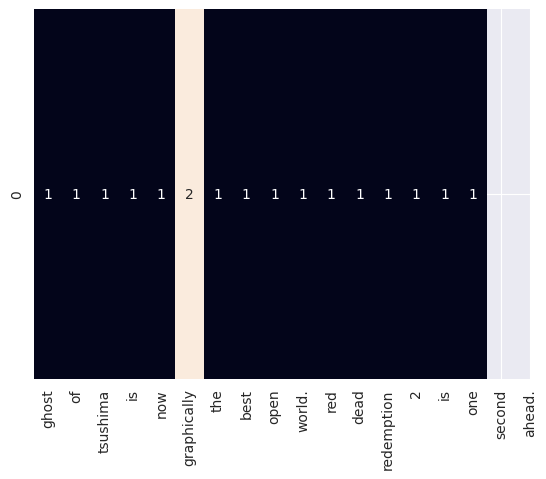

In [47]:
words  = test_text.split()#['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
count_vectorizer = CountVectorizer()
transform = count_vectorizer.fit_transform([test_text]).toarray()
sns.heatmap(transform,annot=True,xticklabels=words,cbar=False)
transform

**TF-IDF:**
Tf_IDF : Actually , TF-IDF is composed of two parts.Firtsly , Tf which stands for Term Frequancy is how many times a word appears in a document.
(counting the number of words and divide it to the number of all words in the sentence)
IDF : which stands for Inverse Document Frequancy , is how common a word is found in a corpus or how uncommon a word is found in a corpus.
(measure of how important a term is across all documents in the corpus)
Result is actually a number between 0 and 1 , It is calculated by taking the logarithm of the total number of documents in the corpus divided
by number the of documents in which the term appears
However , it can not be a perfect manner to show just a single example to describe TF-IDF , but I will show it for better understanding

array([[0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.45883147, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573]])

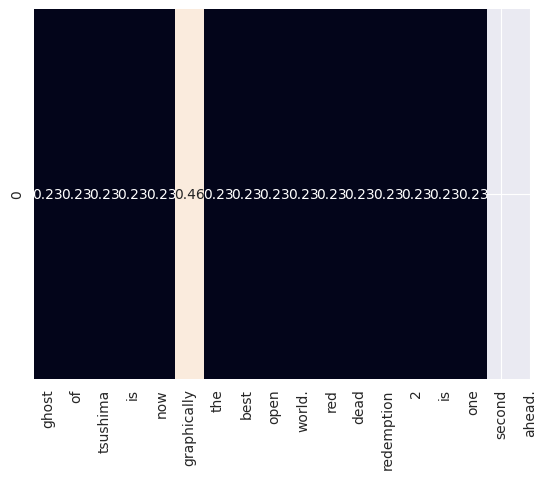

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
words = test_text.split()
TF_IDF = TfidfVectorizer()
transform = TF_IDF.fit_transform([test_text]).toarray()
sns.heatmap(transform,annot=True,xticklabels=words,cbar=False)
transform

In [49]:
print(transform)
print(words)

[[0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.45883147
  0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
  0.22941573 0.22941573 0.22941573 0.22941573]]
['ghost', 'of', 'tsushima', 'is', 'now', 'graphically', 'the', 'best', 'open', 'world.', 'red', 'dead', 'redemption', '2', 'is', 'one', 'second', 'ahead.']


In [50]:
def n_grams(text,n):
  return [text[i:i+n] for i in range(len(text)-n+1)]

cleaned=test_text_tokenized
n_grams(cleaned,3)

[['ghost', 'of', 'tsushima'],
 ['of', 'tsushima', 'is'],
 ['tsushima', 'is', 'now'],
 ['is', 'now', 'graphically'],
 ['now', 'graphically', 'the'],
 ['graphically', 'the', 'best'],
 ['the', 'best', 'open'],
 ['best', 'open', 'world'],
 ['open', 'world', 'red'],
 ['world', 'red', 'dead'],
 ['red', 'dead', 'redemption'],
 ['dead', 'redemption', '2'],
 ['redemption', '2', 'is'],
 ['2', 'is', 'one'],
 ['is', 'one', 'second'],
 ['one', 'second', 'ahead']]

**Stop words:**
Stop words are words which are very common in a language. In many projects , they are deleted because they can not affect and they
can easily increase the volume of texts without any assistance.
Actually , there is a package which contains all stopwords(in NLTK library) in English which are commonly used for NLP projects.
First we have to determine our language and download the words for that language.
As you can see , there are 179 stopwords in English and I have shown 20 of them .

In [51]:
stopwords_list = stopwords.words("english")
print(f"There are {len(stopwords_list)} of stopwords")
print("**" * 20)
print(stopwords_list[:20])

There are 179 of stopwords
****************************************
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


**Punctuation count**
Now I want to show what punctuations are mostly used in each Mode of views.First, I create a function to read words of each sample for each
Mode and then using defaultdict to count each stop words which exists in the whole samples.Using sorted to adjust them with highest one to lowest
(for 10 most commons , I have used Bar chart to depict)
You can see that , (the , to , and , a) are come the same amount in each Mode with same distribution respectively .

In [52]:
def make_corpus(kind):
  corpus = []
  for text in df.loc[df['Mode'] == kind]['Text'].str.split():
    for word in text:
      corpus.append(word)
  return corpus

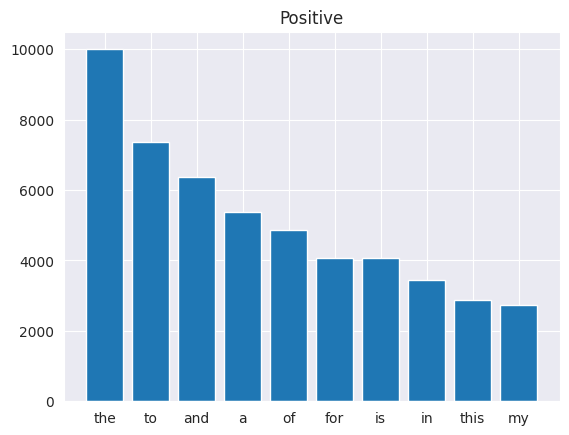

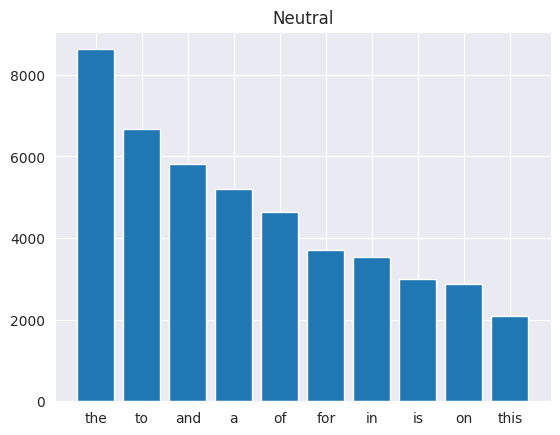

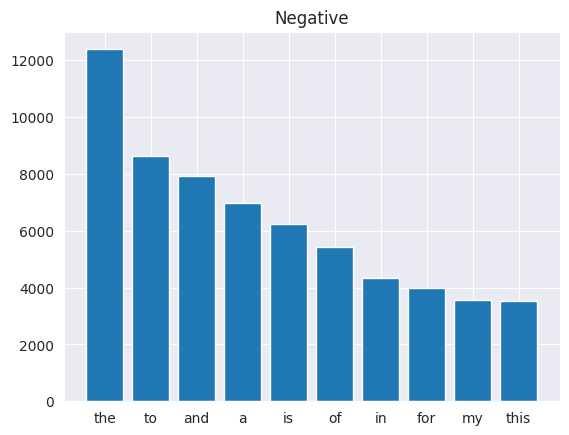

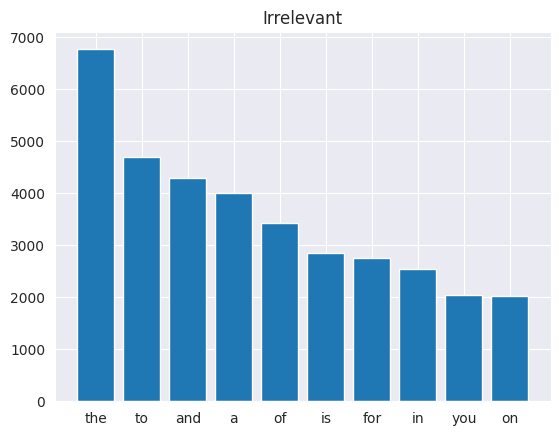

CPU times: user 5.89 s, sys: 367 ms, total: 6.26 s
Wall time: 6.15 s


In [53]:
%%time
stop = stopwords.words("english")
sentiments = list(df.Mode.unique())

for inx,value in enumerate(sentiments):
  corpus = make_corpus(value)
  dic = defaultdict(int)
  for word in corpus:
    if word in stop:
      dic[word]+=1
  top = sorted(dic.items(),key=lambda x: x[1], reverse=True)[:10]
  x,y = zip(*top)
  plt.title(f'{value}')
  plt.bar(x,y)
  plt.show()

**Descripton**
Here , I just do the previous techniques on the dataset to prepare them for the next steps.
clear them with text_clearer , and tokenize them .

In [54]:
df.head()

,Index,Land,Mode,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [55]:
df['Text'] = df['Text'].apply(lambda x:text_cleaner(x))
df['Text'] = df['Text'].apply(lambda x:Tokenizor.tokenize(x))
df['Text'].to_frame()

,Text
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[im, getting, on, borderlands, and, i, will, k..."
2,"[im, coming, on, borderlands, and, i, will, mu..."
3,"[im, getting, on, borderlands, 2, and, i, will..."
4,"[im, getting, into, borderlands, and, i, can, ..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


**Lemmatization :**
Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to
identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.
**Stemming :**
Stemming is a natural language processing technique that is used to reduce words to their base form, also known as the root form.The word
after stemming is called stem of that word.
**Difference :**
The most important different between Lemmatization and stemming is that , Lemmatization is more accurate and it brings a word to the
language root of that word and stemming can be anything which means for computer and is not readable for humans(sometimes not readable)
However , stemming is also faster and is a great way for huge corpus. **Sample**:
In the example I have shown the lemma of each word **Dataset**
for the all dataset , we can afford either , which I have commented lemmatization method , if we want Lemmatization we can uncomment it and use
instead of stemming technique.
 **Note**
In the following code , before stemming , we are deleting all stopwords from each sample and then afford its stemmig for each word.

In [56]:
nlp=spacy.load("en_core_web_sm")
doc = nlp(test_text)
for token in doc:
  print(f"{token} = {token.lemma_}")


ghost = ghost
of = of
tsushima = tsushima
is = be
now = now
graphically = graphically
the = the
best = well
open = open
world = world
. = .
red = red
dead = dead
redemption = redemption
2 = 2
is = be
one = one
second = second
ahead = ahead
. = .


In [57]:
Stemmer=PorterStemmer()
def stopwords_cleaner(text):
  word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
  peasting = ' '.join(word)
  return peasting

df['Text'] = df['Text'].apply(lambda x:stopwords_cleaner(x))

In [58]:
df['Text'][:10].to_frame()

,Text
0,come border kill
1,im get borderland kill
2,im come borderland murder
3,im get borderland 2 murder
4,im get borderland murder
5,spent hour make someth fun know huge borderlan...
6,spent coupl hour someth fun know huge borderla...
7,spent hour someth fun know huge borderland fan...
8,spent hour make someth fun know huge rhandlerr...
9,2010 spent hour make someth fun know huge rhan...


**WordCloud**
word Cloud is just a data visualization technique used for representing text data in which the size of each word indicates its frequency or
importance.Now , I will show the most important words(common ones) exclude stopwords for each Mode.

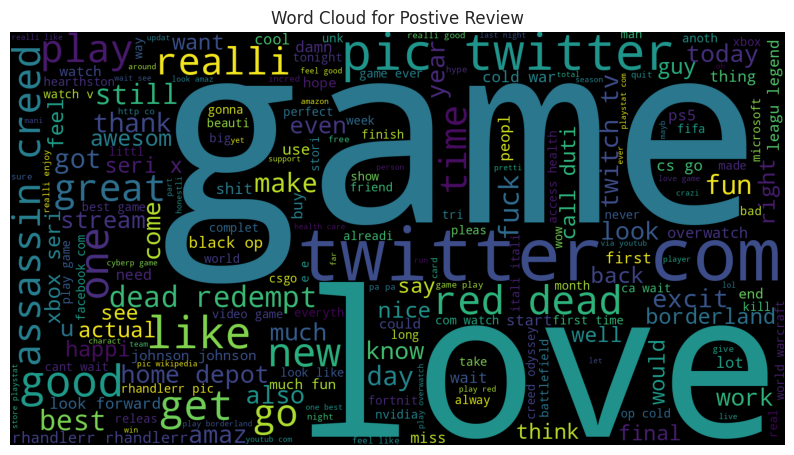

CPU times: user 4.42 s, sys: 206 ms, total: 4.63 s
Wall time: 4.73 s


In [59]:
%%time
positive_reviews=df[df["Mode"] == "Positive"]['Text']
pos = ' '.join(map(str,positive_reviews))
pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Postive Review')
plt.axis('off')
plt.show()

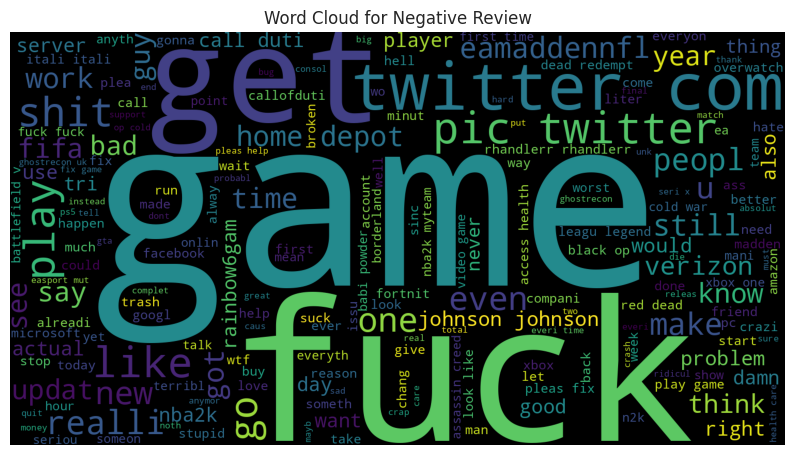

CPU times: user 4.86 s, sys: 216 ms, total: 5.08 s
Wall time: 5.12 s


In [60]:
%%time
positive_reviews=df[df["Mode"] == "Negative"]['Text']
pos = ' '.join(map(str,positive_reviews))
pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Review')
plt.axis('off')
plt.show()

In [61]:
df["Mode"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

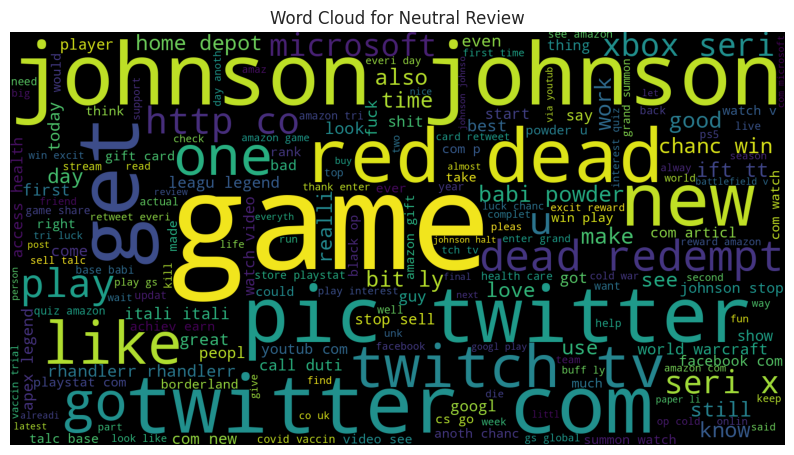

CPU times: user 3.84 s, sys: 202 ms, total: 4.04 s
Wall time: 3.94 s


In [62]:
%%time
positive_reviews=df[df["Mode"] == "Neutral"]['Text']
pos = ' '.join(map(str,positive_reviews))
pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Review')
plt.axis('off')
plt.show()

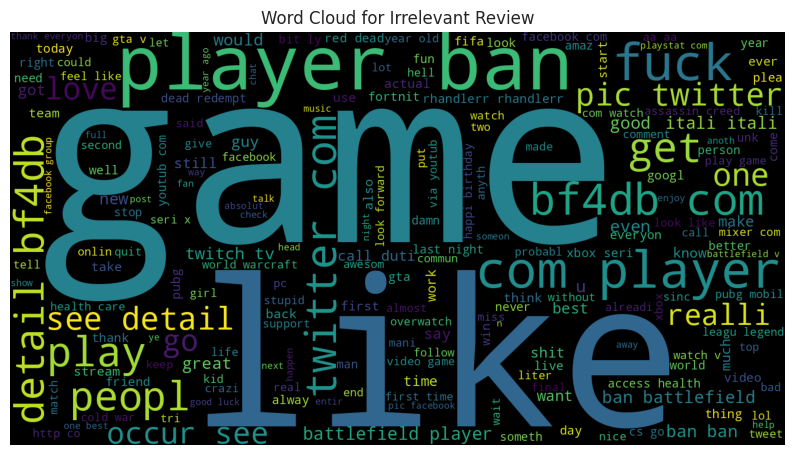

CPU times: user 3.77 s, sys: 161 ms, total: 3.94 s
Wall time: 3.94 s


In [63]:
%%time
positive_reviews=df[df["Mode"] == "Irrelevant"]['Text']
pos = ' '.join(map(str,positive_reviews))
pos_wordcloud = WordCloud(width=1500,height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Irrelevant Review')
plt.axis('off')
plt.show()

**Descripton**
A number of fundamental statistics are shown below to know about corpus .such as , maximum , minimum length of texts ,
mean of length , std and the last calculation which is momentous is the number of words which we are required to have for each sample
we should not allow all words of each sample be in the review).For example, someone has a review with 797 words. so it is computiationally expensive and furthermore , it dosent allow our model to learn perfectly.Instead of all words , we are going to use a formula to keep 95% of data , but
with a samller amount of data for learning better and instead of those additional words we use a special character namely PAD becuase all sample
should have the same length. here , Mew + 2 sigma is 165.7 which we are going to use 166 words of each sample.

In [64]:
len_text = [len(tx) for tx in df['Text'].to_list()]
print(f'Max_length :{np.max(len_text)}')
print(f'Min length :{np.min(len_text)}')
print(f'Std Length :{round(np.mean(len_text),2)}')
print(f'Std Length :{round(np.std(len_text),2)}')
print(f'Mew + 2 Sigma :{round(np.mean(len_text)+2 * np.std(len_text),2)}')

Max_length :797
Min length :0
Std Length :67.68
Std Length :49.01
Mew + 2 Sigma :165.7


**Descripton**
Now , after removing all stop words we want to see what words are most common for each mode in our corpus.Like wordcloud
but in a barchart to have better insights. (either wordcloud or this way is enough for representing)

['Positive', 'Neutral', 'Negative', 'Irrelevant']


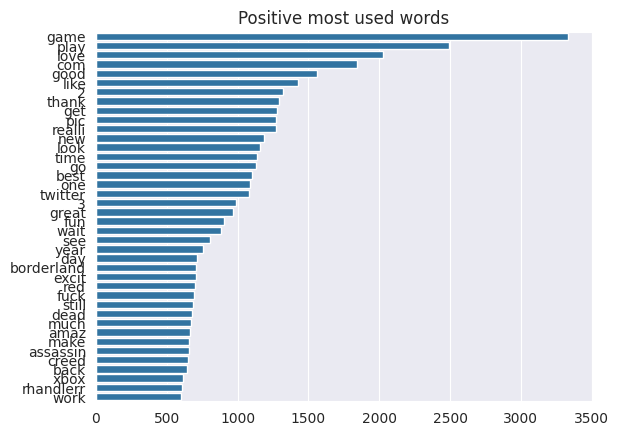

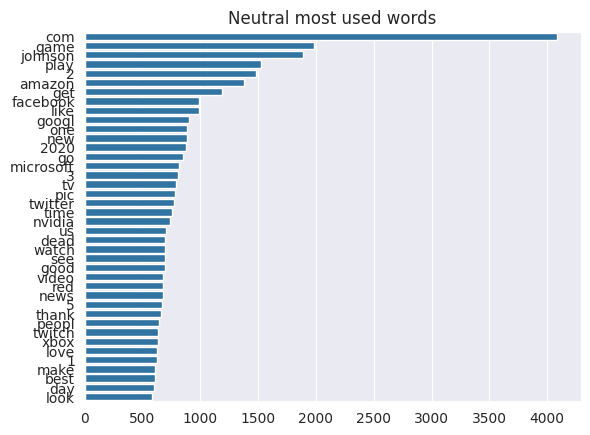

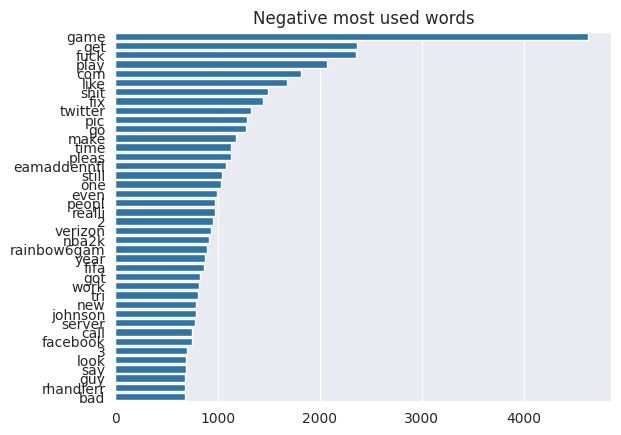

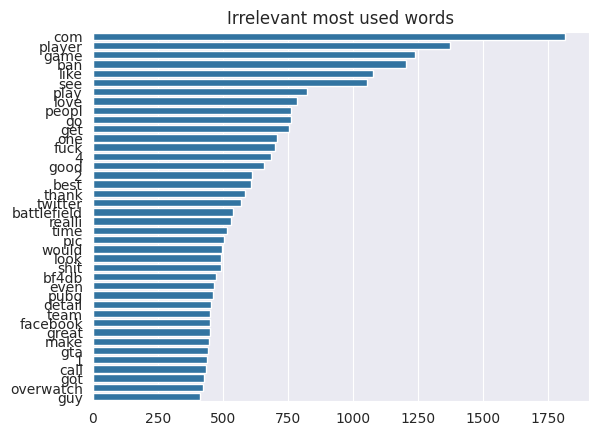

CPU times: user 3.72 s, sys: 227 ms, total: 3.95 s
Wall time: 4.07 s


In [65]:
%%time
print(sentiments)
for inx,value in enumerate(sentiments):
  counter = Counter(make_corpus(value))
  most_common=counter.most_common()
  x = []
  y = []
  for word,count in most_common[:40]:
    if word not in stop:
      x.append(word)
      y.append(count)
  sns.barplot(x=y,y=x,orient='h')
  plt.title(f'{value} most used words')
  plt.show()

**Descripton**
we are going to create a column namely sentiments and instead of Positive , Negative we put 1 and 0 , instead of Neutral and
Irrelevant we put 2. It means that underestanding Positive and Negative reviews is much more important for use rather that neutral and
Irrelevant ones.(Just for decreasing the calsses and increasing the accuracy for finding Positive and Negative ones) however , we are able to
classify each one of them without mixing , but of curse the accuracy will decrease noticeably.

In [66]:
df['sentiments'] = df['Mode'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})

In [67]:
df.sample(10)

,Index,Land,Mode,Text,sentiments
20120,12644,WorldOfCraft,Neutral,earn glori el uldir raider achiev,2
20501,12711,WorldOfCraft,Positive,love see feelsstrongman,1
16452,9618,PlayStation5(PS5),Irrelevant,wish nigga would shit,3
35088,8028,Microsoft,Negative,takealot think pretti uneth sell devic longer ...,0
9397,12815,Xbox(Xseries),Positive,test savostor ship delic item glad say got per...,1
55459,2322,CallOfDuty,Negative,140 headset hear anyon run behind massiv back ...,0
11731,8416,NBA2K,Negative,n2k suck piec shit ass server still gotten cro...,0
65362,7993,MaddenNFL,Positive,jame best safeti list,1
69870,3971,Cyberpunk2077,Irrelevant,see studio trigger get excit,3
67988,3644,Cyberpunk2077,Positive,0 chanc game come style ca wait play action,1


**Descripton**
Now , we are going to create a customer class to show len and item.

In [68]:
class Dataset:
  def __init__(self,text,sentiment):
    self.text = text
    self.sentiment = sentiment
  def __len__(self):
    return len(self.text)
  def __getitem__(self,item):
    text = self.text[item,:]
    target = self.sentiment[item]
    return {
        "text" : torch.tensor(text,dtype=torch.long),
        "target":torch.tensor(target,dtype=torch.long)
    }

**Descripton**
We require helper functions to help us reading word vectors(we have a vord vector to give our model to understand the distant meaning of each words
and by that we can improve our model accuracy. There are many word vectors whcih I will use glove.6B.300d 300 is the dimention.you can use less
ones. More is better understanding but computationally higher.)and them another function to help us create embedding matrix for our corpus words.

In [69]:
def load_vectors(fname):
  fin = open(fname,encoding="utf8")
  data = {}
  for line in fin:
    tokens = line.split()
    data[tokens[0]] = np.array([float(value) for value in tokens[1:]])
  return data

In [70]:
def create_embedding_matrix(word_index,embedding_dict):
  embedding_matrix = np.zeros(len(word_index)+1,300)
  for word, i in word_index.items():
    if word in embedding_dict:
      embedding_matrix[i] = embedding_dict[word]
  return embedding_matrix

**Descripton**
Creating our Model with the help of sentimentBiLSTM from nn.Module.Described each part in the code

In [71]:
class sentimentBiLSTM(nn.Module):
  def __init__(self,embedding_matrix,hidden_dim,output_size):

    #initializing the params by initialization method
    super(sentimentBiLSTM,self).__init__()
    self.embedding_matrix = embedding_matrix
    self.hidden_dim = hidden_dim
    num_words = self.embedding_matrix.shape[0]
    embed_dim = self.embedding_matrix.shape[1]
    self.embedding = nn.Embedding(num_embeddings=num_words,embedding_dim=embed_dim)

    ## initializes the weights of the embedding layer to the pretrained embeddings in
    ## embedding_matrix. It first converts embedding_matrix to a PyTorch tensor and
    ## wraps it in an nn.Parameter object, which makes it a learnable parameter of the model.
    self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
    self.embedding.weight.requires.grad = False
    self.lstm = nn.LSTM(embed_dim,hidden_dim,bidirectional=True,batch_first=True)
    #it is multuplied by 2 becuase it is bi_directional if one-sided it didnt need.
    self.fc = nn.Linear(hidden_dim * 2,output_size)
    #we need a forward function to model calculate the cost and know how bad the params is .
    # However , it can be written in a line of code but if we want to track it it is easier way.

  def forward(self,x):
    embeds = self.embedding(x)
    lstm_out,_ = self.lstm(embeds)
    lstm_out = lstm_out[:,-1]
    out = self.fc(lstm_out)
    return out




**Descripton**
spliting data to train and test => 80% for train and 20% for test

In [72]:
y = df.sentiments.values
train_df,test_df = train_test_split(df,test_size=0.2,stratify=y)

**Descripton**
Max_length as mew + 2sigma = 167
Batch size is a number that detremined based on your system 16-32-64...
Hidden_dimention for the model will be 64
output is the number of classes which we have (len(classes))
Also check if Cuda is available we put our system on GPU else CPU

In [73]:
MAX_LEN = 167
BATCH_SIZE=32
hidden_dim=64
output_size = 3

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(f"Current device is {device}")

Current device is cpu


**Descripton**
now , we need to convert each sample to a readable way and deleting all extra words more than 167 and put PAD character instead
we use texts_to_sequences function to do that.and then using DataLoader to read data for both Train and Test.

In [74]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.Text.values.tolist())
xtrain = tokenizer.texts_to_sequences(train_df.Text.values)
xtest = tokenizer.texts_to_sequences(test_df.Text.values)
xtrain = tf.keras.preprocessing.sequence.pad_sequences(xtrain,maxlen=MAX_LEN)
xtest = tf.keras.preprocessing.sequence.pad_sequences(xtest,maxlen=MAX_LEN)
train_dataset=Dataset(text=xtrain,sentiment=train_df.sentiments.values)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,drop_last=True)
valid_dataset=Dataset(text=xtest,sentiment=test_df.sentiments.values)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size=BATCH_SIZE,drop_last=True)


In [75]:
one_batch=next(iter(train_loader))
one_batch

{'text': tensor([[    0,     0,     0,  ...,   645,   343, 21374],
         [    0,     0,     0,  ...,   538,  1582,  7257],
         [    0,     0,     0,  ...,    63, 14448,  2176],
         ...,
         [    0,     0,     0,  ...,  2754,     3,    54],
         [    0,     0,     0,  ...,    22,  2586,   183],
         [    0,     0,     0,  ...,     2,  1528, 19357]]),
 'target': tensor([3, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 3, 0, 2, 1, 0, 0, 3, 2, 3,
         3, 3, 0, 0, 1, 1, 0, 2])}

**Descripton**
As I said , we need a word vector (glove.6B.300d) which Im using and now load it and tokenize it

In [78]:
df["Text"]

0                                         come border kill
1                                   im get borderland kill
2                                im come borderland murder
3                               im get borderland 2 murder
4                                 im get borderland murder
                               ...                        
74676    realiz window partit mac like 6 year behind nv...
74677    realiz mac window partit 6 year behind nvidia ...
74678    realiz window partit mac 6 year behind nvidia ...
74679    realiz window partit mac like 6 year behind nv...
74680    like window partit mac like 6 year behind driv...
Name: Text, Length: 71655, dtype: object

In [80]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text', 'sentiments'], dtype='object')

In [81]:
Y = df['sentiments']

In [82]:
X = df.drop("sentiments",axis=1)

In [83]:
X.head()

,Index,Land,Mode,Text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland 2 murder
4,2401,Borderlands,Positive,im get borderland murder


In [84]:
messages = X.copy()

In [85]:
X["Text"][1]

'im get borderland kill'

In [86]:
messages.reset_index(inplace=True)

In [89]:
voc_size = 1000

In [91]:
onehot_repr = [one_hot(words,voc_size) for words in messages["Text"]]

In [93]:
onehot_repr[0]

[458, 45, 330]

In [94]:
messages["Text"][0]

'come border kill'

## Embedding Techniques

In [95]:
sent_length=20
embedded_docs = pad_sequences(onehot_repr,padding="pre",maxlen=sent_length)
print(embedded_docs)

[[  0   0   0 ... 458  45 330]
 [  0   0   0 ...  52 671 330]
 [  0   0   0 ... 458 671 249]
 ...
 [  0   0   0 ... 376 601 667]
 [  0   0   0 ... 601 431 667]
 [  0   0   0 ... 376 601 667]]


In [97]:
from tensorflow.keras.models import Sequential

In [115]:
### Creating Model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(4,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            40000     
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 96804 (378.14 KB)
Trainable params: 96804 (378.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [100]:
voc_size

1000

In [101]:
len(embedded_docs),Y.shape

(71655, (71655,))

In [102]:
X_final = np.array(embedded_docs)
Y_final = np.array(Y)

In [103]:
X_final.shape

(71655, 20)

In [104]:
X_final

array([[  0,   0,   0, ..., 458,  45, 330],
       [  0,   0,   0, ...,  52, 671, 330],
       [  0,   0,   0, ..., 458, 671, 249],
       ...,
       [  0,   0,   0, ..., 376, 601, 667],
       [  0,   0,   0, ..., 601, 431, 667],
       [  0,   0,   0, ..., 376, 601, 667]], dtype=int32)

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

In [114]:
x_train

array([[  0,   0,   0, ..., 340, 667, 566],
       [970, 344, 371, ..., 314, 559, 256],
       [  0,   0,   0, ..., 991, 984, 179],
       ...,
       [  0,   0,   0, ..., 813, 750, 818],
       [  0,   0,   0, ..., 676, 566, 747],
       [  0,   0,   0, ..., 788, 824, 733]], dtype=int32)

In [117]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
751/751 [==============================] - 35s 43ms/step - loss: 1.1586 - accuracy: 0.4969 - val_loss: 1.0912 - val_accuracy: 0.5427
Epoch 2/10
751/751 [==============================] - 32s 43ms/step - loss: 1.0489 - accuracy: 0.5630 - val_loss: 1.0551 - val_accuracy: 0.5580
Epoch 3/10
751/751 [==============================] - 32s 43ms/step - loss: 0.9981 - accuracy: 0.5867 - val_loss: 1.0190 - val_accuracy: 0.5794
Epoch 4/10
751/751 [==============================] - 32s 43ms/step - loss: 0.9386 - accuracy: 0.6148 - val_loss: 0.9957 - val_accuracy: 0.5905
Epoch 5/10
751/751 [==============================] - 32s 43ms/step - loss: 0.8908 - accuracy: 0.6366 - val_loss: 0.9682 - val_accuracy: 0.6086
Epoch 6/10
751/751 [==============================] - 33s 44ms/step - loss: 0.8453 - accuracy: 0.6574 - val_loss: 0.9404 - val_accuracy: 0.6190
Epoch 7/10
751/751 [==============================] - 33s 43ms/step - loss: 0.7987 - accuracy: 0.6795 - val_loss: 0.9260 - val_accuracy:

In [118]:
### Creating Model
embedding_vector_features=40
bimodel=Sequential()
bimodel.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
bimodel.add(Bidirectional(LSTM(100)))
bimodel.add(Dense(4,activation="softmax"))
bimodel.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
print(bimodel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            40000     
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 4)                 804       
                                                                 
Total params: 153604 (600.02 KB)
Trainable params: 153604 (600.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [119]:
bimodel.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
751/751 [==============================] - 56s 67ms/step - loss: 1.1603 - accuracy: 0.4981 - val_loss: 1.0804 - val_accuracy: 0.5473
Epoch 2/10
751/751 [==============================] - 53s 70ms/step - loss: 1.0439 - accuracy: 0.5667 - val_loss: 1.0411 - val_accuracy: 0.5678
Epoch 3/10
751/751 [==============================] - 52s 69ms/step - loss: 0.9872 - accuracy: 0.5929 - val_loss: 1.0076 - val_accuracy: 0.5879
Epoch 4/10
751/751 [==============================] - 50s 67ms/step - loss: 0.9330 - accuracy: 0.6208 - val_loss: 0.9869 - val_accuracy: 0.5994
Epoch 5/10
751/751 [==============================] - 51s 68ms/step - loss: 0.8831 - accuracy: 0.6470 - val_loss: 0.9552 - val_accuracy: 0.6184
Epoch 6/10
751/751 [==============================] - 53s 71ms/step - loss: 0.8290 - accuracy: 0.6691 - val_loss: 0.9304 - val_accuracy: 0.6326
Epoch 7/10
751/751 [==============================] - 55s 73ms/step - loss: 0.7763 - accuracy: 0.6938 - val_loss: 0.9061 - val_accuracy:

In [122]:
voc_size = 5000
onehot_repr = [one_hot(words,voc_size) for words in messages["Text"]]
sent_length=40
embedded_docs = pad_sequences(onehot_repr,padding="pre",maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4347 4389  129]
 [   0    0    0 ... 3942 4347  129]
 [   0    0    0 ... 4347 4347  937]
 ...
 [   0    0    0 ... 4482 2178 1824]
 [   0    0    0 ... 2178 4954 1824]
 [   0    0    0 ... 4482 2178 1824]]


In [123]:
### Creating Model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(4,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
print(model.summary())

X_final = np.array(embedded_docs)
Y_final = np.array(Y)
x_train,x_test,y_train,y_test = train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 40)            200000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
Total params: 256804 (1003.14 KB)
Trainable params: 256804 (1003.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
751/751 [==============================] - 78s 99ms/step - loss: 1.0488 - accuracy: 0.5565 - val_loss: 0.9062 - val_accuracy: 0.6361
Epoch 2/10
751/751 [==============================] - 62s 83ms/step - loss: 0.7587 - accuracy: 0.7027 - val_loss: 0.7750 - val_

In [ ]:
# # Evaluate the model on the validation set
# loss, accuracy = model.evaluate(X_val, y_val)
# print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# # Make predictions
# y_pred = model.predict(X_val)
# y_pred_classes = np.argmax(y_pred, axis=1)


In [ ]:
voc_size = 5000
onehot_repr = [one_hot(words,voc_size) for words in messages["Text"]]
sent_length=40
embedded_docs = pad_sequences(onehot_repr,padding="pre",maxlen=sent_length)
print(embedded_docs)
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(4,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
print(model.summary())

X_final = np.array(embedded_docs)
Y_final = np.array(Y)
x_train,x_test,y_train,y_test = train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

[[   0    0    0 ... 4347 4389  129]
 [   0    0    0 ... 3942 4347  129]
 [   0    0    0 ... 4347 4347  937]
 ...
 [   0    0    0 ... 4482 2178 1824]
 [   0    0    0 ... 2178 4954 1824]
 [   0    0    0 ... 4482 2178 1824]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 40)            200000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 4)                 804       
                                                                 
Total params: 313604 (1.20 MB)
Trainable params: 313604 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________________